<font size="5">Frequentist Inference Case Study - <b>Part A</b></font>

# 1. Learning objectives

Welcome to part A of the Frequentist Inference Case Study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. Frequentist inference is the process of deriving conclusions about an underlying distribution via the observation of data. In particular, you'll practice writing Python code to apply the following statistical concepts:
* $\small\textbf{z-statistic}$
* $\small\textbf{t-statistic}$
* Difference and relationship between the two
* $\small\textbf{Central Limit Theorem (CLT)}$, including its assumptions and consequences
* How to estimate the population mean and standard deviation from a sample
* Sampling distribution of a test statistic, particularly for the mean
* Combining these concepts to calculate a $\small\textbf{Confidence Interval (CI)}$

# 2. Prerequisites

To be able to complete this notebook, you are expected to have a basic understanding of:
* what a random variable is (p.400 of Professor Spiegelhalter's *The Art of Statistics, hereinafter AoS*)
* what a population, and a population distribution, are (p. 397 of *AoS*)
* a high-level sense of what the normal distribution is (p. 394 of *AoS*)
* what the t-statistic is (p. 275 of *AoS*)

Happily, these should all be concepts with which you are reasonably familiar after having read ten chapters of Professor Spiegelhalter's book, *The Art of Statistics*.

We'll try to relate the concepts in this case study back to page numbers in *The Art of Statistics* so that you can focus on the Python aspects of this case study. The second part (part B) of this case study will involve another, more real-world application of these tools.

For this notebook, we will use data sampled from a known normal distribution. This allows us to compare our results with theoretical expectations.

# 2. An introduction to sampling from the normal distribution

First, let's explore the ways we can generate the normal distribution. While there's a fair amount of interest in [sklearn](https://scikit-learn.org/stable/) within the machine learning community, you're likely to have heard of [scipy](https://docs.scipy.org/doc/scipy-0.15.1/reference/index.html) if you're coming from the sciences. For this assignment, you'll use [scipy.stats](https://docs.scipy.org/doc/scipy-0.15.1/reference/tutorial/stats.html) to complete your work.

This assignment will require some digging around and getting your hands dirty (your learning is maximized that way)! You should have the research skills and the tenacity to do these tasks independently, but if you struggle, reach out to your immediate community and your mentor for help.

## Dependencies

In [57]:
import numpy as np
from numpy.random import seed

import pandas as pd

from scipy.stats import t
from scipy.stats import norm

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

---

## $\small\textbf{Q1.}$ <code><b>scipy.stats.norm</b></code>

Call up the documentation for the `norm` function imported above. (Hint: that documentation is [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)). What is the second listed method?

In [58]:
help(norm)

Help on norm_gen in module scipy.stats._continuous_distns:

<scipy.stats._continuous_distns.norm_gen object>
    A normal continuous random variable.
    
    The location (``loc``) keyword specifies the mean.
    The scale (``scale``) keyword specifies the standard deviation.
    
    As an instance of the `rv_continuous` class, `norm` object inherits from it
    a collection of generic methods (see below for the full list),
    and completes them with details specific for this particular distribution.
    
    Methods
    -------
    rvs(loc=0, scale=1, size=1, random_state=None)
        Random variates.
    pdf(x, loc=0, scale=1)
        Probability density function.
    logpdf(x, loc=0, scale=1)
        Log of the probability density function.
    cdf(x, loc=0, scale=1)
        Cumulative distribution function.
    logcdf(x, loc=0, scale=1)
        Log of the cumulative distribution function.
    sf(x, loc=0, scale=1)
        Survival function  (also defined as ``1 - cdf``, but `sf

---

## $\small\textbf{Q2.}$ Random samples ($\small n=5$)

 Use the method that generates random variates (<code><b>np.random</b></code>) to draw five samples from the standard normal distribution (<code><b>.normal</b></code>).

In [59]:
seed(47)
random_samples = np.random.normal(size=5)
print(random_samples)

[-0.84800948  1.30590636  0.92420797  0.6404118  -1.05473698]


---

### $\small\textbf{Q3.}$ $\mu$

What is the mean of this sample? Is it exactly equal to the value you expected? Hint: the sample was drawn from the standard normal distribution. If you want a reminder of the properties of this distribution, check out p. 85 of *AoS*.

In [60]:
random_samples_mean = np.mean(random_samples)
print(random_samples_mean)

0.19355593334131074


---

### From scratch

#### $\small\textbf{Q4.}$ $\sigma$

What is the standard deviation of these numbers? Calculate this manually here as $\Large\sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n}}$ (This is just the definition of **standard deviation** given by Professor Spiegelhalter on p.403 of *AoS*). Hint: np.sqrt() and np.sum() will be useful here and remember that numPy supports [broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).

In [61]:
n = len(random_samples)

In [62]:
# print(
#     n
# )

In [63]:
random_samples_sum = 0
for random_sample in random_samples:
    random_samples_sum += (random_sample - random_samples_mean)**2

In [64]:
# print(
#     random_samples_sum
# )

In [65]:
random_samples_std = np.sqrt(
    random_samples_sum/n
)

In [66]:
print(
    random_samples_std
)

0.9606195639478641


Here we have calculated the actual standard deviation of a small data set (of size 5). But in this case, this small data set is actually a sample from our larger (infinite) population. In this case, the population is infinite because we could keep drawing our normal random variates until our computers die!

In general, the sample mean we calculate will not be equal to the population mean (as we saw above). A consequence of this is that the sum of squares of the deviations from the _population_ mean will be bigger than the sum of squares of the deviations from the _sample_ mean. In other words, the sum of squares of the deviations from the _sample_ mean is too small to give an unbiased estimate of the _population_ variance. An example of this effect is given [here](https://en.wikipedia.org/wiki/Bessel%27s_correction#Source_of_bias). Scaling our estimate of the variance by the factor $n/(n-1)$ gives an unbiased estimator of the population variance. This factor is known as [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction). The consequence of this is that the $n$ in the denominator is replaced by $n-1$.

You can see Bessel's correction reflected in Professor Spiegelhalter's definition of **variance** on p. 405 of *AoS*.

---

#### $\small\textbf{Q5.}$ $s$

If all we had to go on was our five samples, what would be our best estimate of the population standard deviation? Use Bessel's correction ($n-1$ in the denominator), thus $\sqrt{\Large\frac{\sum_i(x_i - \bar{x})^2}{n-1}}$.

In [67]:
ddof_sample = n - 1

In [68]:
# print(
#     random_samples_count_sample
# )

In [69]:
random_samples_std_sample = np.sqrt(
    random_samples_sum/ddof_sample
)

In [70]:
print(
    random_samples_std_sample
)

1.0740053227518152


---

### Using NumPy

#### $\small\textbf{Q6.}$ $\sigma$

Now use numpy's std function to calculate the standard deviation of our random samples. Which of the above standard deviations did it return?

In [71]:
np.std(
    random_samples
)

0.9606195639478641

---

#### $\small\textbf{Q7.}$ $s$

Consult the documentation for <code><b>np.std()</b></code> to see how to apply the correction for estimating the population parameter and verify this produces the expected result.

In [72]:
# help(np.std)

In [73]:
np.std(
      random_samples
    , ddof = 1
)

1.0740053227518152

---

## Summary

In this section, you've :

* Been introduced to the <code><b>scipy.stats</b></code> package and used it to draw a small sample from the standard normal distribution.

* Calculated the average (the mean) of this sample and seen that this is not exactly equal to the expected population parameter (which we know because we're generating the random variates from a specific, known distribution).

* Been introduced to two ways of calculating the standard deviation; one uses $n$ in the denominator and the other uses $n-1$ ($\small\textbf{Bessel's correction)}$. You've also seen which of these calculations <code><b>np.std()</b></code> performs by default and how to get it to generate the other.

  * You use $n$ as the denominator if you want to calculate the standard deviation of a sequence of numbers. You use $n-1$ if you are using this sequence of numbers to estimate the population parameter. This brings us to some terminology that can be a little confusing.

  * The population parameter is traditionally written as $\sigma$ and the sample statistic as $s$. Rather unhelpfully, $s$ is also called the sample standard deviation (using $n-1$) whereas the standard deviation of the sample uses $n$. That's right, we have the sample standard deviation and the standard deviation of the sample and they're not the same thing!

    * The sample standard deviation
\begin{equation}
s = \sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n-1}} \approx \sigma,
\end{equation}
is our best (unbiased) estimate of the population parameter ($\sigma$).

    * If your dataset _is_ your entire population, you simply want to calculate the population parameter, $\sigma$, via
\begin{equation}
\sigma = \sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n}}
\end{equation}

as you have complete, full knowledge of your population. In other words, your sample _is_ your population. It's worth noting that we're dealing with what Professor Spiegehalter describes on p. 92 of *AoS* as a **metaphorical population**: we have all the data, and we act as if the data-point is taken from a population at random. We can think of this population as an imaginary space of possibilities.

If, however, you have sampled _from_ your population, you only have partial knowledge of the state of your population. In this case, the standard deviation of your sample is not an unbiased estimate of the standard deviation of the population, in which case you seek to estimate that population parameter via the sample standard deviation, which uses the $n-1$ denominator.

Great work so far! Now let's dive deeper.

---

---

---

# 3. Sampling distributions

So far we've been dealing with the concept of taking a sample from a population to infer the population parameters. One statistic we calculated for a sample was the mean. As our samples will be expected to vary from one draw to another, so will our sample statistics. If we were to perform repeat draws of size $n$ and calculate the mean of each, we would expect to obtain a distribution of values. This is the sampling distribution of the mean. **The Central Limit Theorem (CLT)** tells us that such a distribution will approach a normal distribution as $n$ increases (the intuitions behind the CLT are covered in full on p. 236 of *AoS*). For the sampling distribution of the mean, the standard deviation of this distribution is given by

\begin{equation}
\sigma_{mean} = \frac{\sigma}{\sqrt n}
\end{equation}

where $\sigma_{mean}$ is the standard deviation of the sampling distribution of the mean and $\sigma$ is the standard deviation of the population (the population parameter).

This is important because typically we are dealing with samples from populations and all we know about the population is what we see in the sample. From this sample, we want to make inferences about the population. We may do this, for example, by looking at the histogram of the values and by calculating the mean and standard deviation (as estimates of the population parameters), and so we are intrinsically interested in how these quantities vary across samples.

In other words, now that we've taken one sample of size $n$ and made some claims about the general population, what if we were to take another sample of size $n$? Would we get the same result? Would we make the same claims about the general population? This brings us to a fundamental question: _when we make some inference about a population based on our sample, how confident can we be that we've got it 'right'?_

We need to think about **estimates and confidence intervals**: those concepts covered in Chapter 7, p. 189, of *AoS*.

## Population ($\small n=50,000$)

Now, the standard normal distribution (with its variance equal to its standard deviation of one) would not be a great illustration of a key point. Instead, let's imagine we live in a town of 50,000 people and we know the height of everyone in this town. We will have 50,000 numbers that tell us everything about our population. We'll simulate these numbers now and put ourselves in one particular town, called 'town 47', where the population mean height is 172 cm and population standard deviation is 5 cm.

In [74]:
pop_size     = 50000
heights_std  = 5
heights_mean = 172

> <b><font size="5"><a href="http://scipy.github.io/devdocs/reference/generated/scipy.stats.norm.html"><code><b>scipy.stats.norm.rvs</b></code></a> vs. <a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html"><code><b>np.random.rand</b></code></a></font> ??</b>
>
> * The <a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html"><code><b>np.random.rand</b></code></a> method does not allow to specify a mean or standard deviation. and it produces random numbers that are uniformly distributed over the interval $[0, 1)$.
>
> * On the other hand, <a href="http://scipy.github.io/devdocs/reference/generated/scipy.stats.norm.html"><code><b>scipy.stats.norm.rvs</b></code></a> allows to generate random numbers from a normal (Gaussian) distribution that follow a specific normal distribution. Using this method, we can specify the mean (<code><b>loc</b></code>) and standard deviation (<code><b>scale</b></code>) of the distribution

In [75]:
seed(47)

pop_heights = norm.rvs(
      loc   = heights_mean
    , scale = heights_std
    , size  = pop_size
)

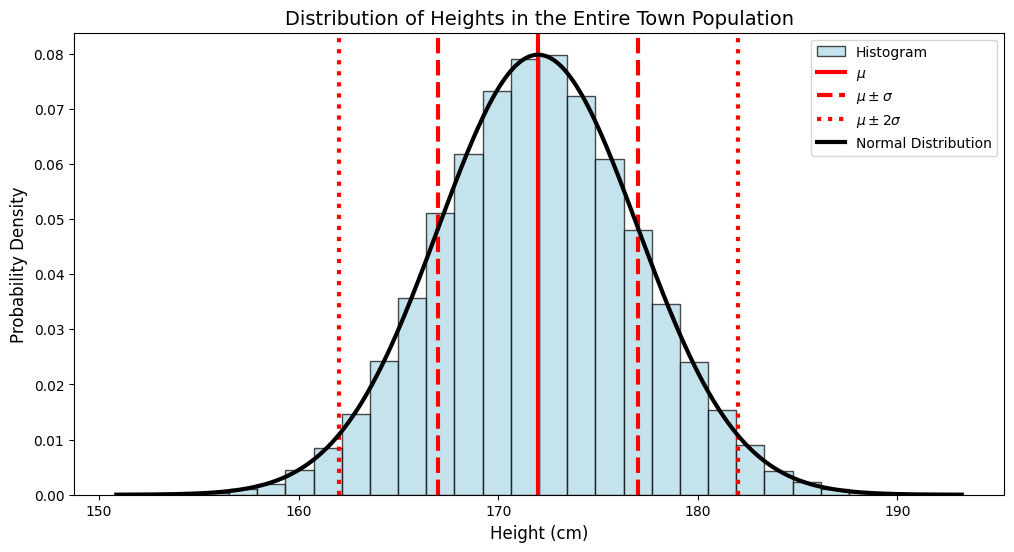

In [76]:
plt.figure(figsize=(12, 6))

# Create the histogram
plt.hist(pop_heights, bins=30, color='lightblue', edgecolor='black', density=True, alpha=0.7, label='Histogram')
plt.xlabel('Height (cm)', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.title('Distribution of Heights in the Entire Town Population', fontsize=14)

# Plot vertical lines for mean and standard deviations
plt.axvline(heights_mean, color='red', linewidth=3, linestyle='solid', label='$\mu$')
plt.axvline(heights_mean + 1 * heights_std, color='red', linewidth=3, linestyle='--', label='$\mu \pm \sigma$')
plt.axvline(heights_mean - 1 * heights_std, color='red', linewidth=3, linestyle='--')
plt.axvline(heights_mean + 2 * heights_std, color='red', linewidth=3, linestyle='dotted', label='$\mu \pm 2\sigma$')
plt.axvline(heights_mean - 2 * heights_std, color='red', linewidth=3, linestyle='dotted')

# Add a legend
plt.legend()

# Create a range of x values for the normal distribution curve
x = np.linspace(min(pop_heights), max(pop_heights), 1000)

# Calculate the PDF of the normal distribution using the mean and standard deviation
pdf = norm.pdf(x, heights_mean, heights_std)

# Plot the normal distribution curve
plt.plot(x, pdf, 'k-', linewidth=3, label='Normal Distribution')

# Add a legend
plt.legend()

# Show the plot
plt.show()

Now, $50,000$ people is rather a lot to chase after with a tape measure. If all you want to know is the average height of the townsfolk, then can you just go out and measure a sample to get a pretty good estimate of the average height?

In [77]:
def townsfolk_sampler(sample_size):
    return np.random.choice(pop_heights, sample_size)

Let's say you go out one day and randomly sample 10 people to measure.

In [78]:
seed(47)
daily_sample1 = townsfolk_sampler(10)

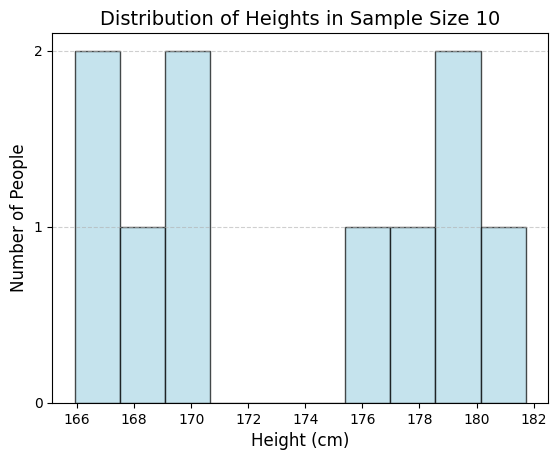

In [114]:
# Create the histogram with better formatting
plt.hist(daily_sample1, bins=10, color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('Height (cm)', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.title('Distribution of Heights in Sample Size 10', fontsize=14)

# Set the y-axis locator to display only integer values
ax = plt.gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Customize the tick labels for x-axis (optional)
plt.xticks(fontsize=10)

# Customize the tick labels for y-axis (optional)
plt.yticks(fontsize=10)

# Show the plot
plt.show()

The sample distribution doesn't resemble what we take the population distribution to be. What do we get for the mean?

In [80]:
np.mean(daily_sample1)

173.47911444163503

And if we went out and repeated this experiment?

In [81]:
daily_sample2 = townsfolk_sampler(10)

In [82]:
np.mean(daily_sample2)

173.7317666636263

---

## $\small\textbf{Q8.}$ Sample ($\small n=365$)

Simulate performing this random trial every day for a year, calculating the mean of each daily sample of 10, and plot the resultant sampling distribution of the mean.

In [83]:
seed(47)

means = []
for i in range(365):
    daily_sampler = townsfolk_sampler(10)
    daily_mean = np.mean(daily_sampler)
    means.append(daily_mean)

print(means[0:5]) #to check it worked, basically performing .head() on a list

[173.47911444163503, 173.7317666636263, 172.54893867276104, 171.43257319553967, 172.7151613148319]


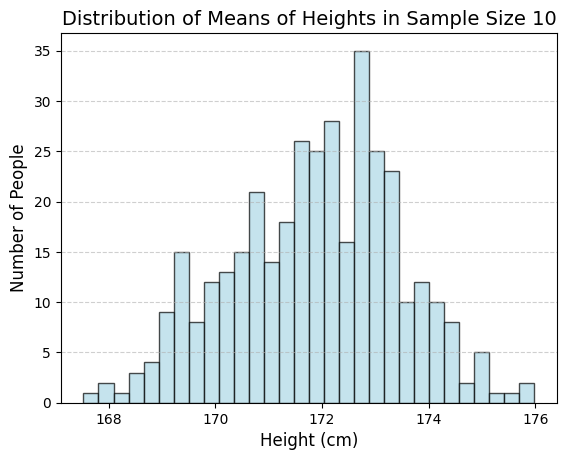

In [84]:
# Create the histogram with better formatting
plt.hist(means, bins=30, color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('Height (cm)', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.title('Distribution of Means of Heights in Sample Size 10', fontsize=14)

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Customize the tick labels for x-axis (optional)
plt.xticks(fontsize=10)

# Customize the tick labels for y-axis (optional)
plt.yticks(fontsize=10)

# Show the plot
plt.show()


The above is the distribution of the means of samples of size $10$ taken from our population. The Central Limit Theorem tells us the expected mean of this distribution will be equal to the population mean, and standard deviation will be $\sigma / \sqrt n$, which, in this case, should be approximately $1.58\text{cm}$.

---

### $\small\textbf{Q9.}$ Verification

Verify the above results from the CLT.

Verify that the mean and standard deviation of this distribution are approximately equal to the population mean of 172cm and population standard deviation of 5cm, respectively.

In [85]:
np.mean(means)

171.8660049358649

In [86]:
np.std(means)

1.5756704135286475

Remember, in this instance, we knew our population parameters, that the average height really is 172 cm and the standard deviation is 5 cm, and we see some of our daily estimates of the population mean were as low as around 168 and some as high as 176.

---

## $\small\textbf{Q10.}$ Sample ($\small n=50$)

Repeat the above year's worth of samples but for a sample size of 50 (perhaps you had a bigger budget for conducting surveys that year)! Would you expect your distribution of sample means to be wider (more variable) or narrower (more consistent)? Compare your resultant summary statistics to those predicted by the CLT.

In [87]:
seed(47)

# calculate daily means from the larger sample size here
means50 = []
for i in range(365):
    daily_sampler50 = townsfolk_sampler(50)
    daily_mean50 = np.mean(daily_sampler50)
    means50.append(daily_mean50)

print(means50[:5]) #to check it worked, basically performing .head() on a list

[172.7815108576788, 172.79757492503552, 172.9396310954854, 173.3542075784445, 171.1485580390421]


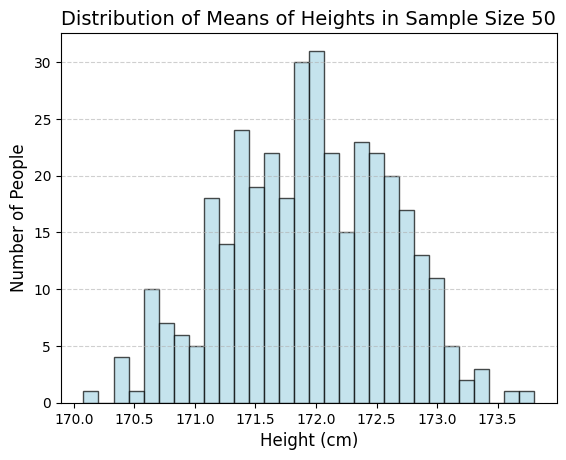

Mean of means50: 171.94 cm
Standard deviation of means50: 0.67 cm
The resultant mean from samples of 50 is slightly closer to the expected population mean of 172.
The resultant standard deviation is significantly smaller than the exercise of samples of 10 - the distribution is much narrower.


In [88]:
# Create the histogram with better formatting
plt.hist(means50, bins=30, color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('Height (cm)', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.title('Distribution of Means of Heights in Sample Size 50', fontsize=14)

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Customize the tick labels for x-axis (optional)
plt.xticks(fontsize=10)

# Customize the tick labels for y-axis (optional)
plt.yticks(fontsize=10)

# Show the plot
plt.show()

# Print additional information
print(f"Mean of means50: {np.mean(means50):.2f} cm")
print(f"Standard deviation of means50: {np.std(means50):.2f} cm")
print("The resultant mean from samples of 50 is slightly closer to the expected population mean of 172.")
print("The resultant standard deviation is significantly smaller than the exercise of samples of 10 - the distribution is much narrower.")


What we've seen so far, then, is that we can estimate population parameters from a sample from the population, and that samples have their own distributions. Furthermore, the larger the sample size, the narrower are those sampling distributions.

---

## Normally testing time!

All of the above is well and good.

* We've been sampling from a population we know is normally distributed.

* We've come to understand when to use $n$ and when to use $n-1$ in the denominator to calculate the spread of a distribution.

* We've  seen the Central Limit Theorem (CLT) in action for a sampling distribution.

All seems very well behaved in Frequentist land. But, well, why should we really care?

Remember, we rarely (if ever) actually know our population parameters but we still have to estimate them somehow. If we want to make inferences to conclusions like "this observation is unusual" or "my population mean has changed" then we need to have some idea of what the underlying distribution is so we can calculate relevant probabilities. In frequentist inference, we use the formulae above to deduce these population parameters. Take a moment in the next part of this assignment to refresh your understanding of how these probabilities work.

Recall some basic properties of the standard normal distribution, such as that $\approx 68\%$ of observations are within $\mu \pm \sigma$. Check out the precise definition of a normal distribution on p. 394 of *AoS*.

## $\small\textbf{Q11.}$ $\Phi(z \leq 1)$

Using this fact, calculate the probability of observing the value $1$ or less in a single observation from the standard normal distribution.

> <b>Hint:</b> you may find it helpful to sketch the standard normal distribution (the familiar bell shape) and mark the number of standard deviations from the mean on the x-axis and shade the regions of the curve that contain certain percentages of the population.

To determine the probability of observing a value of $1$ or less in a single observation from the standard normal distribution, we employ the concept of the $z$-score. Since the standard deviation $\sigma$ of the standard normal distribution is $1$, we infer that the $z$-score associated with our target value, $1$, is also $1$. This signifies that $1$ lies precisely one standard deviation above the mean $\mu$ of the standard normal distribution.

Utilizing a tabulated reference for $z$-scores, we discern that the cumulative probability to the left of the $z$-score $1$, representing the likelihood of a single observation being $\leq 1$ under this normal distribution, is $0.8413$ or $84.13\%$.

In [89]:
# Population's Mean
mu = np.mean(pop_heights)
print(f"Mean: {mu}")

# Population's Standard Deviation
sigma = np.std(pop_heights)
print(f"Standard Deviation: {sigma}")

Mean: 172.0192602425845
Standard Deviation: 4.990839139566387


---

### $\small\textbf{Q12.}$ Using SciPy

1. Calculating this probability involves calculating the area under the curve for $z \leq 1$.

2. To put it in mathematical terms, we need to *integrate* the Probability Density Function (PDF).

* In the example above, we could just add together the known areas of chunks $(-\infty, 0]$ and $[0, \sigma]$.

* One way to do this is to look up tables (literally). Fortunately, scipy has this functionality built in with the cdf() function.

* Use the <code><b>scipy.stats.norm.cdf()</b></code> function to answer the question above again and verify you get the same answer.

In [90]:
# help(norm.cdf)

In [91]:
z = 1

In [92]:
norm.cdf(z)

0.8413447460685429

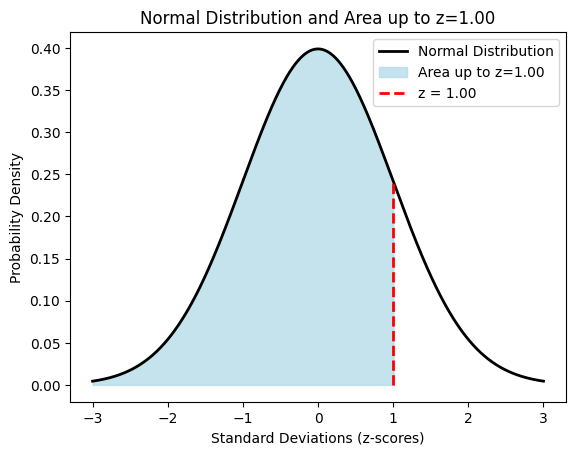

In [93]:
# Find the x-value where the red dashed line intersects the CDF curve
intersection_x = norm.ppf(norm.cdf(z, loc=0, scale=1))

# Create a range of x values for the normal distribution curve
x = np.linspace(-3, 3, 1000)

# Calculate the PDF of the standard normal distribution
pdf = norm.pdf(x, loc=0, scale=1)

# Create the figure and axis
fig, ax = plt.subplots()

# Plot the normal distribution curve
ax.plot(x, pdf, 'k-', linewidth=2, label='Normal Distribution')

# Fill the area under the curve up to z
ax.fill_between(x, 0, pdf, where=(x <= intersection_x), interpolate=True, color='lightblue', alpha=0.7, label=f'Area up to z={z:.2f}')

# Plot the red dashed line starting from zero up to the intersection point
ax.plot([intersection_x, intersection_x], [0, norm.pdf(z, loc=0, scale=1)], 'r--', linewidth=2, label=f'z = {z:.2f}')

# Customize the plot
ax.set_xlabel('Standard Deviations (z-scores)')
ax.set_ylabel('Probability Density')
ax.set_title(f'Normal Distribution and Area up to z={z:.2f}')
ax.legend()

# Show the plot
plt.show()

As can be seen, the resultant answer is the same.

---

## $\small\textbf{Q13.}$ $\Phi(z \vert x=177\text{cm})$

Using our knowledge of the population parameters for our townsfolks' heights, what is the probability of selecting one person at random and their height being $\leq 177 \text{cm}$? Calculate this using both of the approaches given above.

In [94]:
x177 = 177

In [95]:
# Calculate the z-score of x=177
z177 = (x177 - mu) / sigma
print(z177)

0.9979764160157327


### Using $z$-table

Using $z$-table (<i>AKA</i> lookup table), this corresponds to approximately $p = .8389$ or $83.89\%$.

### Using SciPy

In [96]:
p177 = norm.cdf(z177)
print(p177)

0.8408546025640735


Using the <code><b>norm.cdf</b></code>, this corresponds to approximately $p = .84$ or $84\%$. - very close to the value from the lookup table.

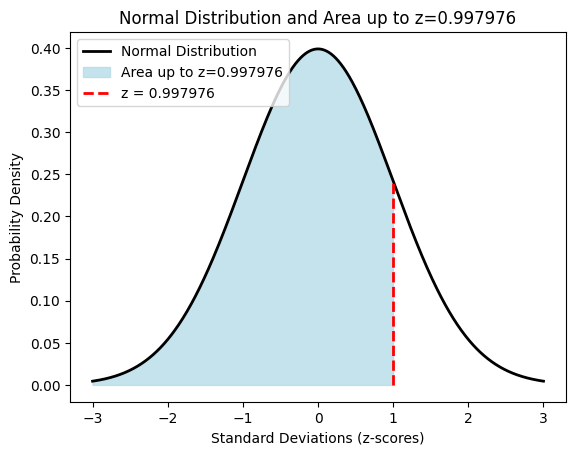

In [97]:
# Find the x-value where the red dashed line intersects the CDF curve
intersection_x = norm.ppf(norm.cdf(z177, loc=0, scale=1))

# Create the figure and axis
fig, ax = plt.subplots()

# Plot the normal distribution curve
ax.plot(x, pdf, 'k-', linewidth=2, label='Normal Distribution')

# Fill the area under the curve up to the intersection point
ax.fill_between(x, 0, pdf, where=(x <= intersection_x), interpolate=True, color='lightblue', alpha=0.7, label=f'Area up to z={z177:.6f}')

# Plot the red dashed line starting from zero up to the intersection point
ax.plot([intersection_x, intersection_x], [0, norm.pdf(z177, loc=0, scale=1)], 'r--', linewidth=2, label=f'z = {z177:.6f}')

# Customize the plot
ax.set_xlabel('Standard Deviations (z-scores)')
ax.set_ylabel('Probability Density')
ax.set_title(f'Normal Distribution and Area up to z={z177:.6f}')
ax.legend(loc='upper left')

# Show the plot
plt.show()

---

## $\small\textbf{Q14.}$ $\Phi(z \vert x=200\text{cm})$

Turning this question around — suppose we randomly pick one person and measure their height and find they are 2.00 m tall. How surprised should we be at this result, given what we know about the population distribution? In other words, how likely would it be to obtain a value at least as extreme as this? Express this as a probability.

In [98]:
x200 = 200

In [99]:
# Calculate z-score for x=200
z200 = (x200 - mu) / sigma
print(z200)

5.606419877489083


### Using SciPy

In [100]:
p200 = norm.cdf(z200)
print(p200)

0.9999999896722737


In [101]:
#p200 is equal to the probability that a person chosen would be 200cm tall OR LESS, so to get the likelihood that they would be TALLER than 200cm, we need to subtract p200 from 1.
p_over200 = 1 - p200
print(p_over200)

1.0327726340797483e-08


> <b>NOTE:</b> There is a very small probability of picking someone from this population who is over 2m tall.

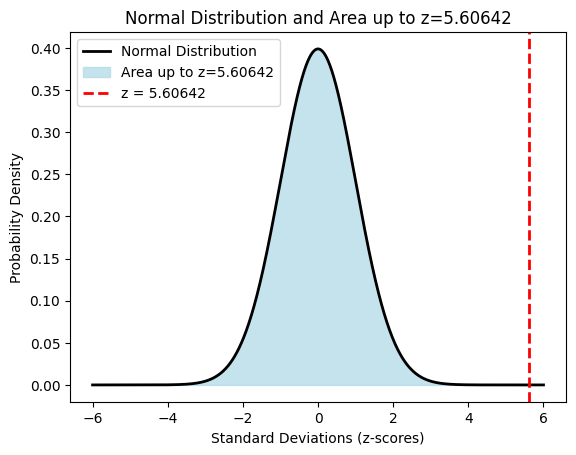

In [102]:
# Create a range of x values for the normal distribution curve
x = np.linspace(-6, +6, 1000)

# Calculate the PDF of the standard normal distribution
pdf = norm.pdf(x, loc=0, scale=1)

# Create the figure and axis
fig, ax = plt.subplots()

# Plot the normal distribution curve with a black color and thicker dashed line
ax.plot(x, pdf, 'k-', linewidth=2, label='Normal Distribution')  # 'k--' specifies a black dashed line

# Fill the area under the curve up to z200
ax.fill_between(x, 0, pdf, where=(x <= z200), interpolate=True, color='lightblue', alpha=0.7, label=f'Area up to z={z200:.5f}')

# Customize the plot
ax.set_xlabel('Standard Deviations (z-scores)')
ax.set_ylabel('Probability Density')
ax.set_title(f'Normal Distribution and Area up to z={z200:.5f}')
ax.axvline(z200, color='red', linestyle='--', linewidth=2, label=f'z = {z200:.5f}')

# Place the legend in the top-right corner
ax.legend(loc='best')

# Show the plot
plt.show()


What we've just done is calculate the ***p-value*** of the observation of someone 2.00m tall (review *p*-values if you need to on p. 399 of *AoS*). We could calculate this probability by virtue of knowing the population parameters. We were then able to use the known properties of the relevant normal distribution to calculate the probability of observing a value at least as extreme as our test value.

We're about to come to a pinch, though. We've said a couple of times that we rarely, if ever, know the true population parameters; we have to estimate them from our sample and we cannot even begin to estimate the standard deviation from a single observation.

This is very true and usually we have sample sizes larger than one. This means we can calculate the mean of the sample as our best estimate of the population mean and the standard deviation as our best estimate of the population standard deviation.

In other words, we are now coming to deal with the sampling distributions we mentioned above as we are generally concerned with the properties of the sample means we obtain.

Above, we highlighted one result from the CLT, whereby the sampling distribution (of the mean) becomes narrower and narrower with the square root of the sample size. We remind ourselves that another result from the CLT is that _even if the underlying population distribution is not normal, the sampling distribution will tend to become normal with sufficiently large sample size_. (**Check out p. 199 of AoS if you need to revise this**). This is the key driver for us 'requiring' a certain sample size, for example you may frequently see a minimum sample size of 30 stated in many places. In reality this is simply a rule of thumb; if the underlying distribution is approximately normal then your sampling distribution will already be pretty normal, but if the underlying distribution is heavily skewed then you'd want to increase your sample size.

---

## $\small\textbf{Q15.}$ Sample ($\small n=50$)

Let's now start from the position of knowing nothing about the heights of people in our town.
* Use the random seed of <code><b>47</b></code>, to randomly sample the heights of <code><b>50</b></code> townsfolk.
* Estimate the population mean using <code><b>np.mean</b></code> .
* Estimate the population standard deviation using <code><b>np.std</b></code> (remember which denominator to use!).
* Calculate the ($95\%$) [margin of error](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/hypothesis-testing/margin-of-error/#WhatMofE) (use the exact critial z value to 2 decimal places - [look this up](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/find-critical-values/) or use <code><b>norm.ppf</b></code>) Recall that the ***margin of error*** is mentioned on p. 189 of the *AoS* and discussed in depth in that chapter).
* Calculate the 95% Confidence Interval of the mean (***confidence intervals*** are defined on p. 385 of *AoS*)
* Does this interval include the true population mean?

In [103]:
seed(47)
n = 50

In [104]:
heights_sample = np.random.choice(
      pop_heights
    , size = n
)

In [105]:
print(heights_sample)

[179.04949004 168.54189384 181.71974048 176.56433733 165.91968052
 170.65629646 179.37664509 166.40103988 177.15105034 169.41097044
 169.96353026 175.15960886 177.08203296 175.57499516 174.54290109
 172.47967099 168.61822612 174.73274884 170.88926244 178.27468993
 171.52874629 173.48970606 172.0752456  172.29707499 171.58202648
 169.84480352 178.67104246 174.28346436 174.29645483 167.42082214
 168.57939161 169.54392578 167.58621293 176.8657094  164.25755366
 177.38929575 171.97964488 164.94136054 177.90675289 175.2758845
 176.64336688 169.68013675 175.41851966 171.9408919  179.69843965
 169.93651872 169.3320981  172.17010876 171.18783138 171.14370134]


In [106]:
heights_sample_mean = np.mean(
    heights_sample
)

In [107]:
print(
    heights_sample_mean
)

172.7815108576788


In [108]:
heights_sample_std = np.std(heights_sample) * (len(heights_sample)/((len(heights_sample)-1)))

In [109]:
print(
    heights_sample_std
)

4.23801859720889


In [110]:
# Returns the value at the 97.5% percentile, which is approximately where the 95% window is (giving us the value to input to get our z score)
ppf = norm.ppf(
      0.975
    , loc   = heights_sample_mean
    , scale = heights_sample_std
)

In [111]:
marg_error = ppf - heights_sample_mean
print(marg_error)

# Result is as expected - ppf worked as expected
z = marg_error / heights_sample_std
print(z)

8.306363816340394
1.9599639845400558


In [112]:
lower95 = heights_sample_mean - (z * heights_sample_std)
upper95 = heights_sample_mean + (z * heights_sample_std)

print(lower95, upper95)

#The 95% margin of error is +/- 8.3cm.
#We expect 95% of the values for height to be between 164.48cm and 181.09cm.

164.4751470413384 181.0878746740192


In [113]:
#confidence interval for the mean using the norm.ppf function
norm.ppf(
      [0.025, 0.975]
    , heights_sample_mean
    , heights_sample_std/np.sqrt(n)
)

#the confidence interval includes the mean

array([171.60681362, 173.95620809])

---

### $\small\textbf{Q16.}$ $\small\textbf{critical z-value}$

We calculated the confidence interval using the $\small\textbf{critical z-value}$. What is the problem with this? What requirement(s) are we (strictly) failing?

> * Using the critical z-value to calculate a Confidence Interval (CI) assumes that the population standard deviation $\large\sigma$ is known. However, in many real-world scenarios, we may not have access to the $\large\sigma$ and must estimate it using the sample standard deviation $\large s$.
>
> * The critical z-value method strictly <b>fails to provide an accurate CI when we don't know the $\large\sigma$.</b> In such cases, it's more appropriate to use the $\small\textbf{t-distribution}$ and the $\small\textbf{t-value}$ for the desired level of confidence, which accounts for the uncertainty in estimating the population standard deviation from the sample.

---

### $\small\textbf{Q17.}$ $\small\textbf{t-distribution}$

Calculate the $95\%$ confidence interval for the mean using the $\small\textbf{t-distribution}$. Is this wider or narrower than that based on the normal distribution above? If you're unsure, you may find this [resource](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/confidence-interval/) useful. For calculating the critical value, remember how you could calculate this for the normal distribution using <code><b>norm.ppf()</b></code>.

In [ ]:
# degrees of freedom
df = n - 1

critical_values = t.ppf(
      [0.025, 0.975]
    , df
)

In [ ]:
heights_sample_mean + (critical_values * (heights_sample_std/np.sqrt(50)))

array([171.5770793 , 173.98594241])

This CI (t-distribution) is slightly wider than the previous CI (normal distribution). This reflects the greater uncertainty given that we are estimating population parameters from a sample.

---

---

---

# 4. Learning outcomes

Having completed this project notebook, you now have hands-on experience:
* sampling and calculating probabilities from a normal distribution
* identifying the correct way to estimate the standard deviation of a population (the population parameter) from a sample
* with sampling distribution and now know how the Central Limit Theorem applies
* with how to calculate critical values and confidence intervals